In [85]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas_datareader as data
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import datetime
from datetime import time
from pandas.tseries.frequencies import to_offset
import tensorflow as tf
from sklearn import metrics
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

Implementation based on the Mark Minervini Trend Template. Author has dound that these conditions indicates that the stock is ready to potentially be bought and go on a massive run. It could be a good start point for trading.

In [12]:
yf.pdr_override()

start =dt.datetime(2020,12,1)

now = dt.datetime.now()

In [13]:
exportList= pd.DataFrame(columns=['Stock', "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"]) # "RS_Rating",

### Relative Strength (RS) Rating
The RS Rating, ranging from 1 (worst) to 99 (best), measures a stock's price performance over the last 12 months. The best stocks tend to have an 80 or better RS Rating as they launch a new climb.

In [14]:

all_stocks = pd.DataFrame([
	'AXP','AAPL','BA','CAT','CSCO','CVX','XOM','GS','HD','IBM','INTC','JNJ','KO', 
	'SIDU', 'BYND', 'GOLD', 'HOOD', 'EVOK', 'SPOT', 'OKE', 'WWE', 'SRNE', 'ROKU', 'ACAD', 'SNAP', 'DYN', 'OLN', 
	'CVNA', 'TWTR', 'MULN', 'AERC', 'CHWY', 'PINS', 'AMZN', 'AMC', 'AMAT', 'GOOG', 'NIO', 'LI', 'SQ', 'TSM', 'BAC',
	'T', 'ARCT', 'GME', 'TSLA', 'INTC', 'PBR', 'PLTR', 'RBLX', 'KGC', 'ABEV', 'NOK', 'AAL', 'BBD', 'SNAP', 'NVDA', 
	'NLY', 'SOFI', 'ITUB', 'CCL', 'F', 'AMD', 'DIDI'
])
all_stocks.columns = ['Symbol']


for i in all_stocks.index:
	stock=str(all_stocks["Symbol"][i])
	# RS_Rating=all_stocks["RS Rating"][i]

	try:
		df = pdr.get_data_yahoo(stock, start, now)

		SMAused=[50,150,200]
		for x in SMAused:
			sma=x
			df["SMA_"+str(sma)]=round(df.iloc[:,4].rolling(window=sma).mean(),2)


		currentClose=df["Adj Close"][-1]
		moving_average_50=df["SMA_50"][-1]
		moving_average_150=df["SMA_150"][-1]
		moving_average_200=df["SMA_200"][-1]
		low_of_52week=min(df["Adj Close"][-260:])
		high_of_52week=max(df["Adj Close"][-260:])
		try:
			moving_average_200_20 = df["SMA_200"][-20]

		except Exception:
			moving_average_200_20=0

		#Condition 1: Current Price > 150 SMA and > 200 SMA
		if(currentClose>moving_average_150>moving_average_200):
			cond_1=True
		else:
			cond_1=False
		#Condition 2: 150 SMA and > 200 SMA
		if(moving_average_150>moving_average_200):
			cond_2=True
		else:
			cond_2=False
		#Condition 3: 200 SMA trending up for at least 1 month (ideally 4-5 months)
		if(moving_average_200>moving_average_200_20):
			cond_3=True
		else:
			cond_3=False
		#Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
		if(moving_average_50>moving_average_150>moving_average_200):
			#print("Condition 4 met")
			cond_4=True
		else:
			#print("Condition 4 not met")
			cond_4=False
		#Condition 5: Current Price > 50 SMA
		if(currentClose>moving_average_50):
			cond_5=True
		else:
			cond_5=False
		#Condition 6: Current Price is at least 30% above 52 week low (Many of the best are up 100-300% before coming out of consolidation)
		if(currentClose>=(1.3*low_of_52week)):
			cond_6=True
		else:
			cond_6=False
		#Condition 7: Current Price is within 25% of 52 week high
		if(currentClose>=(.75*high_of_52week)):
			cond_7=True
		else:
			cond_7=False
		#Condition 8: IBD RS rating >70 and the higher the better
		# if(RS_Rating>70):
		# 	cond_8=True
		# else:
		# 	cond_8=False
		
		if(cond_1 and cond_2 and cond_3 and cond_4 and cond_5 and cond_6 and cond_7):
			exportList = exportList.append({'Stock': stock,  "50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True) #"RS_Rating": RS_Rating,  and cond_8
	except Exception:
		print("No data on "+stock)
print()
print(exportList)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [86]:
stock = exportList['Stock'][0]

In [24]:
exportList.to_excel(r"C:\Users\simon\Downloads\screened2.xlsx")

In [90]:
# Choosing a period which we want to analyze for training and validating
start = datetime.datetime(2000, 1, 1)
end = datetime.date.today()

# BA boeing company, data from Yahoo finanse
stock_d = data.DataReader(stock, 'yahoo', start, end)

# # week opening
# def week_open(array_like):
#     return array_like[0]

# # week closing
# def week_close(array_like):
#     return array_like[-1]

# # Aplied logic: that opening day is Monday, Closing day is Friday
# logic = {
#                         # Open - first day (Monday) opening value
#                         'Open': week_open, 
#                         # High - max value of the period
#                          'High': 'max',
#                         # Low - min value of the period
#                          'Low': 'min',
#                         #  Close - last day closing value (Friday)
#                          'Close': week_close,
#                          #  Adj Close - last day closing value (Friday)
#                          'Adj Close': week_close,
#                         #  Volume - sum of period Volume values
#                          'Volume': 'sum'}

# # Converting daily data to weekly with aplied logic
# stock_w = stock_d.resample('W').apply(logic) 
# stock_w.index -= to_offset('6D')

df1 = stock_d[['Open', 'High', 'Low',  'Close', 'Adj Close', 'Volume']].reset_index()
df = stock_d[['Open', 'High', 'Low',  'Close', 'Adj Close']] 

In [29]:
print(df.tail(5))

                  Open        High        Low       Close   Adj Close
Date                                                                 
2022-06-10  101.940002  103.349998  99.790001  100.459999  100.459999
2022-06-13   97.519997   97.769997  93.919998   95.849998   95.849998
2022-06-14   97.410004   98.669998  95.269997   96.099998   96.099998
2022-06-15   95.989998   96.570000  93.269997   94.889999   94.889999
2022-06-16   92.410004   93.129997  90.279999   90.669998   90.669998


In [99]:
trace1 = go.Bar(
    x = df1['Date'],
    y = df1['Volume'],
    name='Volume',
    marker=dict(color='rgba(16, 112, 2, 0.8)',
                line=dict(color='rgb(16, 112, 2, 0.8)', width=1.5)),
     
)
trace2 = go.Scatter(
    x = df1['Date'],
    y = df1['Close'],
    # mode='lines+markers',
    name='Close',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)

data = [trace1, trace2]
layout = dict(
    title=f'{stock} Volume',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        )
    )
fig = go.Figure(data=data, layout=layout)            
py.iplot(fig)

## Change the color of Volume bars

In [105]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df1['Date'], y=df1['Close'], name="Close"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(x=df1['Date'], y=df1['Volume'], name="Volume"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text=f"{stock} Close prices and Volume"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Close Price", secondary_y=True)

fig.show()

In [82]:
date_range = df[df["Date"] > "2018-01-01"]

trace1 = go.Scatter(
    x = date_range['Date'],
    y = date_range['Open'],
    # mode='lines+markers',
    name='Open',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x = date_range['Date'],
    y = date_range['Close'],
    # mode='lines+markers',
    name='Close',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x = date_range['Date'],
    y = date_range['Adj Close'],
    # mode='lines+markers',
    name='Adj Close',
    marker=dict(color='rgba(155, 26, 40, 0.8)'),
)
data = [trace1, trace2, trace3]
layout = dict(
    title = f'{stock} 2018-2022',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data, layout=layout)            
py.iplot(fig)

## Building Bidirectional LSTM model

In [30]:
x = 1
validate = df[['Open', 'High', 'Low',  'Close', 'Adj Close']].tail(x)
df.drop(df.tail(x).index,inplace=True)

c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df = df.reset_index()
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.shape)
print(train_dates.tail(15)) #Check last few dates. 

(5650,)
5635   2022-05-25
5636   2022-05-26
5637   2022-05-27
5638   2022-05-31
5639   2022-06-01
5640   2022-06-02
5641   2022-06-03
5642   2022-06-06
5643   2022-06-07
5644   2022-06-08
5645   2022-06-09
5646   2022-06-10
5647   2022-06-13
5648   2022-06-14
5649   2022-06-15
Name: Date, dtype: datetime64[ns]


In [33]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()
X_data = X_scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close', 'Close']])
Y_data = Y_scaler.fit_transform(df[['Close']]) 

In [34]:
def custom_ts_multi_data_prep(df, target, start, end, n_past, n_future):
    X = []
    y = []
    start = start + n_past
    if end is None:
        end = len(df) - n_future
    for i in range(start, end):
        indices = range(i-n_past, i)
        X.append(df[indices])
        indicey = range(i+1, i+1+n_future)
        y.append(target[indicey])
    return np.array(X), np.array(y) 

In [35]:
n_past = 52
n_future = 1
TRAIN_SPLIT = len(df)-300
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, n_past, n_future)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, n_past, n_future) 

In [36]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target\n')
print (y_train[0]) 

Multiple window of past history

[[-1.45439995 -1.4481035  -1.47028504 -1.57180639 -1.48465729]
 [-1.50918372 -1.51387526 -1.50588213 -1.59362365 -1.52329012]
 [-1.49307085 -1.42243647 -1.47190309 -1.53271748 -1.41544012]
 [-1.42539678 -1.31816416 -1.41041722 -1.47181087 -1.30759011]
 [-1.28843735 -1.30693484 -1.31171622 -1.47544715 -1.31402892]
 [-1.3335534  -1.34864376 -1.32304257 -1.49271925 -1.34461325]
 [-1.34483241 -1.33260187 -1.32142452 -1.48908252 -1.33817444]
 [-1.35772271 -1.35506052 -1.34245916 -1.49635509 -1.35105206]
 [-1.35127756 -1.31335159 -1.33436891 -1.46817458 -1.30115131]
 [-1.29971636 -1.32618511 -1.33760501 -1.49271925 -1.34461325]
 [-1.37061301 -1.32618511 -1.3537855  -1.47817389 -1.31885803]
 [-1.33194211 -1.31655997 -1.31980647 -1.46635627 -1.29793191]
 [-1.3077728  -1.33260187 -1.34569526 -1.49362801 -1.34622295]
 [-1.33838726 -1.33420606 -1.32951476 -1.47453783 -1.31241922]
 [-1.30132765 -1.30533065 -1.33760501 -1.4854469  -1.33173564]
 [-1.33838726 -1.31014

In [37]:
batch_size = 64
buffer_size = 150
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=n_future),
 ])
model.compile(optimizer='adam', loss='mse') # metrics='mae
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 52, 128)          35840     
 l)                                                              
                                                                 
 dense (Dense)               (None, 52, 20)            2580      
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               13568     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [40]:

model_path = 'LSTM_multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5) #,  mode='min'
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True,  verbose=0) #mode='min',
callbacks=[early_stopings,checkpoint] 
history = model.fit(train_data,epochs=15,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/15
100/100 [==============================] - 15s 91ms/step - loss: 0.1707 - val_loss: 0.1147
Epoch 2/15
100/100 [==============================] - 8s 84ms/step - loss: 0.1081 - val_loss: 0.0847
Epoch 3/15
100/100 [==============================] - 10s 101ms/step - loss: 0.0833 - val_loss: 0.0636
Epoch 4/15
100/100 [==============================] - 9s 94ms/step - loss: 0.0775 - val_loss: 0.0813
Epoch 5/15
100/100 [==============================] - 9s 87ms/step - loss: 0.0923 - val_loss: 0.1566
Epoch 6/15
100/100 [==============================] - 9s 91ms/step - loss: 0.0714 - val_loss: 0.2597
Epoch 7/15
100/100 [==============================] - 9s 87ms/step - loss: 0.0766 - val_loss: 0.0901
Epoch 8/15
100/100 [==============================] - 9s 92ms/step - loss: 0.0804 - val_loss: 0.0567
Epoch 9/15
100/100 [==============================] - 9s 94ms/step - loss: 0.0815 - val_loss: 0.0523
Epoch 10/15
100/100 [==============================] - 10s 101ms/step - loss: 0.0967 - v

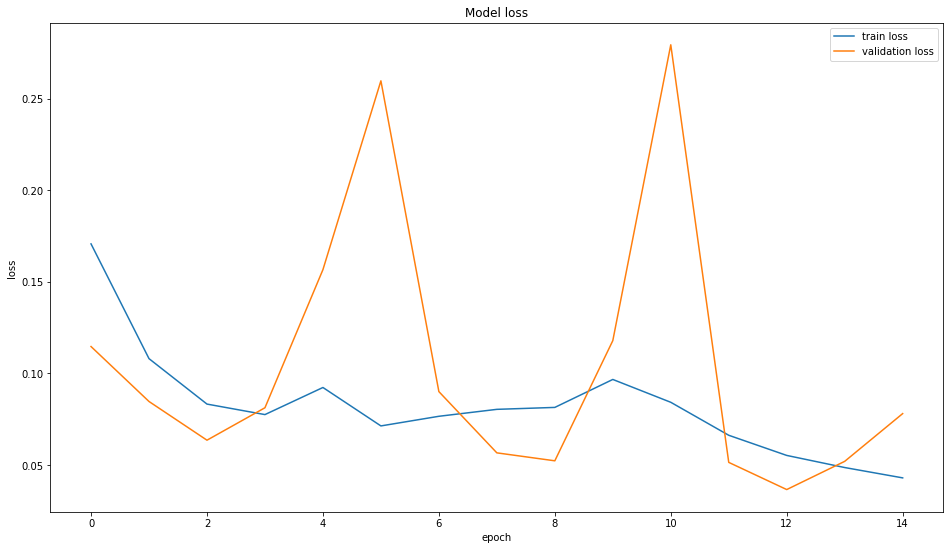

In [41]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

### Forecasting is completely unavailable and must be only estimated with the help of what has already happened.

In [42]:
data_val = X_scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close', 'Close']].tail(52))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred = model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 2s 2s/step


array([[91.28008]], dtype=float32)

In [43]:
validate['Close']

Date
2022-06-16    90.669998
Name: Close, dtype: float64

In [44]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 


timeseries_evaluation_metrics_func(validate['Close'], pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.3722031382494606
MAE is : 0.6100845336914062
RMSE is : 0.6100845336914062
MAPE is : 0.6728626293282111
R2 is : nan



c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Building LSTM model to predict 1 day in future

In [45]:
# Choosing a period which we want to analyze for training and validating
start = datetime.datetime(2000, 1, 1)
end = datetime.date.today()
# Data from Yahoo finanse
stock_d = data.DataReader(stock, 'yahoo', start, end)

df = stock_d[['Open', 'High', 'Low',  'Close', 'Adj Close']] #'Close',

In [55]:
# Choosing a period which we want to analyze for training and validating.
start = datetime.datetime(2000, 1, 1)
end = datetime.date.today()

# Data from Yahoo finanse
df = data.DataReader('XOM', 'yahoo', start, end)


In [56]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,40.37500,38.93750,39.75000,39.15625,13458200.0,19.472017
2000-01-04,39.09375,38.25000,38.68750,38.40625,14510800.0,19.099045
2000-01-05,40.87500,38.90625,39.00000,40.50000,17485000.0,20.140242
2000-01-06,42.90625,40.09375,40.31250,42.59375,19461600.0,21.181452
2000-01-07,43.12500,42.00000,42.96875,42.46875,16603800.0,21.119282


In [57]:
#Separate dates for future plotting
df =  df[['Open', 'High', 'Low', 'Close', 'Adj Close']].reset_index()
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(5)) #Check last few dates. 

5646   2022-06-10
5647   2022-06-13
5648   2022-06-14
5649   2022-06-15
5650   2022-06-16
Name: Date, dtype: datetime64[ns]


In [58]:
#Variables for training
cols = list(df)[1:6]

#Date and volume columns are not used in training. 
print(cols)

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [59]:
# New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

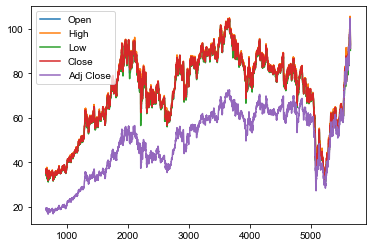

In [60]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()
sns.set(rc={'figure.figsize':(18,10)})

In [61]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized.
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [62]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 30 (past days data used for training)

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features).

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])


In [63]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (5621, 30, 5).
trainY shape == (5621, 1).


In [64]:
# We can only predict a single day after our training, the day after where our data ends
# To predict more days in future, we need all the 5 variables which we do not have. 
# We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           68608     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [65]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
317/317 [==============================] - 11s 30ms/step - loss: 0.0434 - val_loss: 0.0506
Epoch 2/10
317/317 [==============================] - 9s 30ms/step - loss: 0.0199 - val_loss: 0.0243
Epoch 3/10
317/317 [==============================] - 15s 47ms/step - loss: 0.0195 - val_loss: 0.0142
Epoch 4/10
317/317 [==============================] - 13s 40ms/step - loss: 0.0171 - val_loss: 0.0108
Epoch 5/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0168 - val_loss: 0.0126
Epoch 6/10
317/317 [==============================] - 9s 29ms/step - loss: 0.0159 - val_loss: 0.0078
Epoch 7/10
317/317 [==============================] - 10s 30ms/step - loss: 0.0150 - val_loss: 0.0095
Epoch 8/10
317/317 [==============================] - 9s 28ms/step - loss: 0.0141 - val_loss: 0.0061
Epoch 9/10
317/317 [==============================] - 10s 30ms/step - loss: 0.0141 - val_loss: 0.0087
Epoch 10/10
317/317 [==============================] - 9s 30ms/step - loss: 0.0141 - 

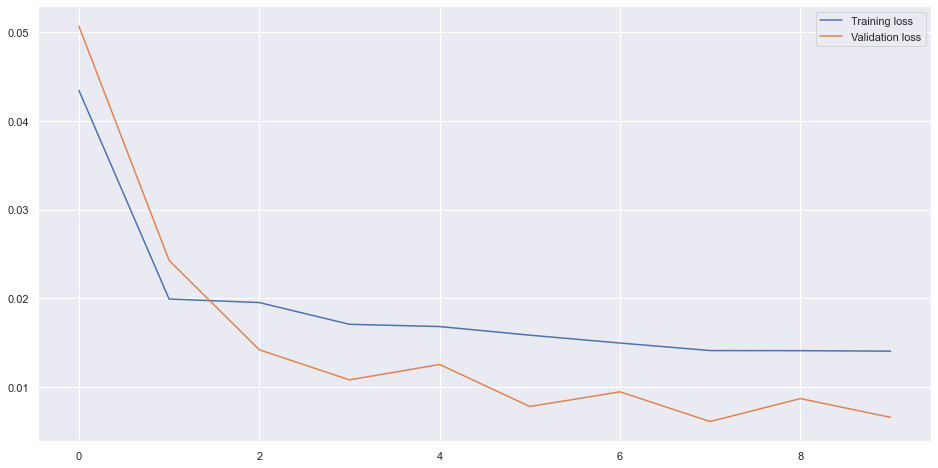

In [66]:
# Plot model history
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Predicting...

In [67]:

#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())


# We can only predict one day in future as our model needs 5 variables
# as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction


[Timestamp('2022-05-25 00:00:00', freq='C'), Timestamp('2022-05-26 00:00:00', freq='C'), Timestamp('2022-05-27 00:00:00', freq='C'), Timestamp('2022-05-31 00:00:00', freq='C'), Timestamp('2022-06-01 00:00:00', freq='C'), Timestamp('2022-06-02 00:00:00', freq='C'), Timestamp('2022-06-03 00:00:00', freq='C'), Timestamp('2022-06-06 00:00:00', freq='C'), Timestamp('2022-06-07 00:00:00', freq='C'), Timestamp('2022-06-08 00:00:00', freq='C'), Timestamp('2022-06-09 00:00:00', freq='C'), Timestamp('2022-06-10 00:00:00', freq='C'), Timestamp('2022-06-13 00:00:00', freq='C'), Timestamp('2022-06-14 00:00:00', freq='C'), Timestamp('2022-06-15 00:00:00', freq='C')]
1/1 [==============================] - 0s 282ms/step


In [68]:
# Perform inverse transformation to rescale back to original range
# We used 5 variables for transform, the inverse expects same dimensions
# Copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [69]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-6-1']

C:\Users\simon\AppData\Local\Temp\ipykernel_20052\119036315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

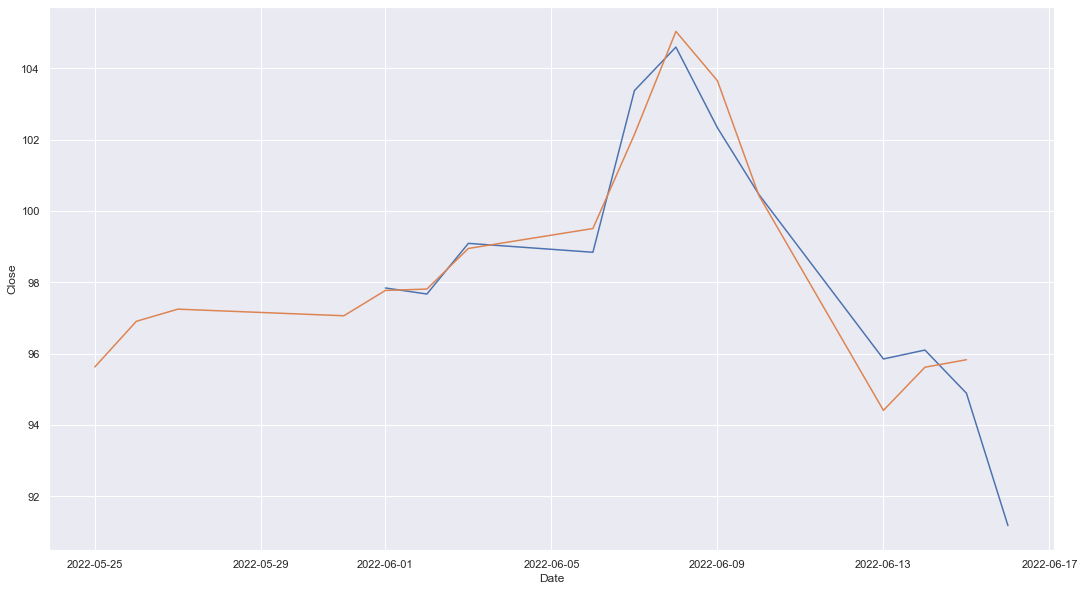

In [70]:
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])